In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
data['flower'] = iris.target

In [6]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   flower  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
data = data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
data.head()

petal length (cm)  petal width (cm)  flower
0                1.4               0.2       0
1                1.4               0.2       0
2                1.3               0.2       0
3                1.5               0.2       0
4                1.4               0.2       0

In [10]:
from sklearn.cluster import KMeans

In [11]:
 model = KMeans(n_clusters=3)

In [13]:
X = data.drop('flower',axis='columns')
y = data['flower']
print(X.shape, y.shape)

(150, 2) (150,)


In [14]:
predictions = model.fit_predict(X)

In [15]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: flower, Length: 150, dtype: int32

In [17]:
data['cluster'] = predictions

In [18]:
data

petal length (cm)  petal width (cm)  flower  cluster
0                  1.4               0.2       0        0
1                  1.4               0.2       0        0
2                  1.3               0.2       0        0
3                  1.5               0.2       0        0
4                  1.4               0.2       0        0
..                 ...               ...     ...      ...
145                5.2               2.3       2        1
146                5.0               1.9       2        1
147                5.2               2.0       2        1
148                5.4               2.3       2        1
149                5.1               1.8       2        1

[150 rows x 4 columns]

In [19]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

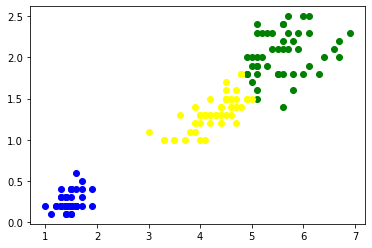

In [22]:
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='blue')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='green')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color='yellow')

In [23]:
sse = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    sse.append(model.inertia_)

C:\ProgramData\Anaconda3\envs\ml_practice\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
print(sse)

[550.8953333333333, 86.39021984551391, 31.371358974358966, 19.477123363965468, 13.91690875790876, 11.06844643186428, 9.191170634920635, 7.624193062579726, 6.545263125763124, 5.551913395641016]


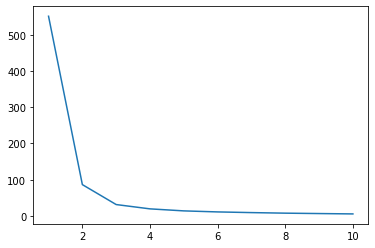

In [26]:
plt.plot(range(1,11),sse)